In [107]:
# Spotify popularity predictor

## Step 1: Import Libraries & Load Dataset

In [109]:
# Importing required libraries for data handling, visualization, and loading the dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('spotifydataset.csv')

# Preview the data
df.head()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [110]:
#creating features with data frame
# Checking column names
print(df.columns)

# Separating features and target
features = df.drop('target', axis=1)
target = df['target']


Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [111]:
# Creating full DataFrame
df_full = features.copy()
df_full['target'] = target

# Checking nulls and unique values
print(df_full['target'].isnull().sum())  # Should be 0
print(df_full['target'].unique()[:10])   # Just to check sample values


0
[1 0]


## Step 2: Exploratory Data Analysis (EDA)

In [113]:
# View Basic Information

In [114]:
# viewing the dataset shape, first few rows, and data types to understand the structure.
print(df.head())       
print(df.info())      
print(df.describe())   


   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0               4    0.286       1        Mask Off            Future  
1   

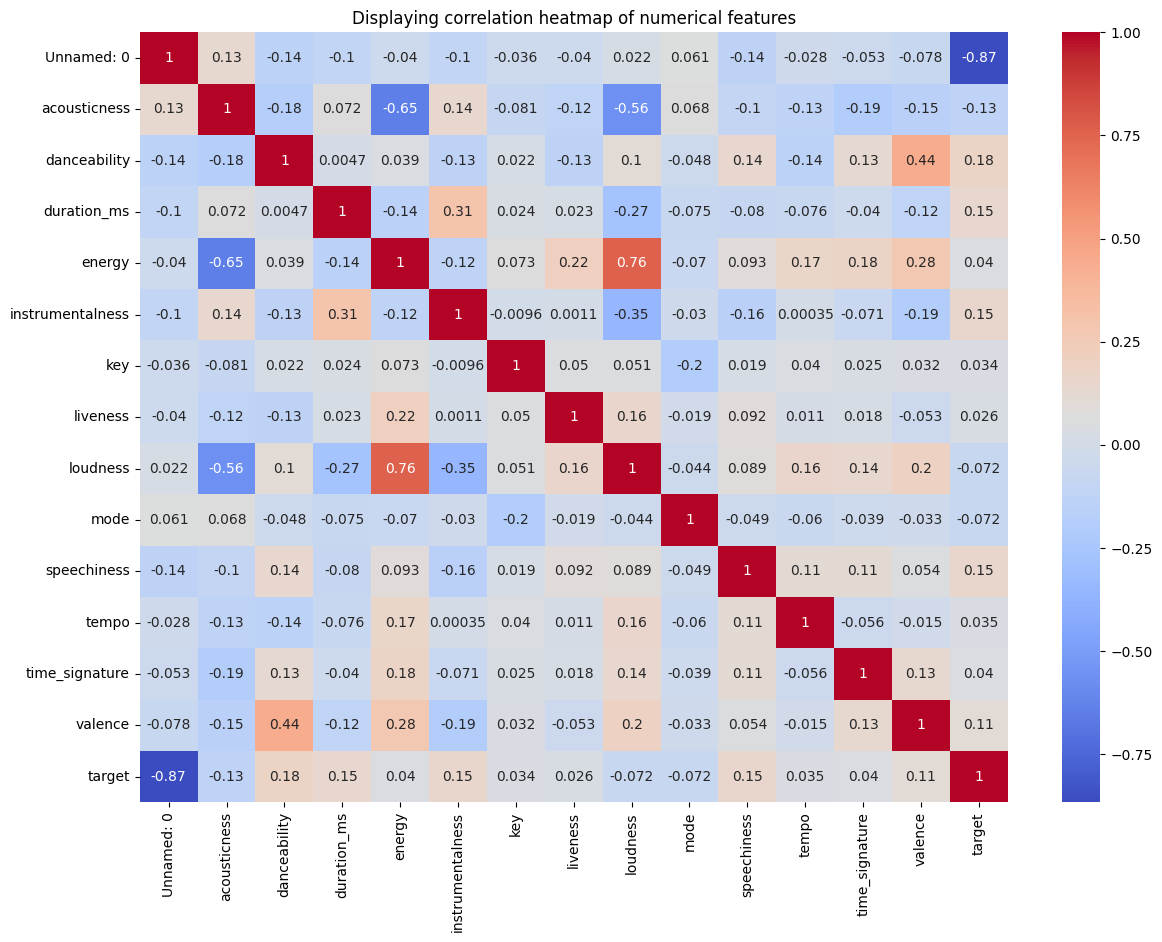

In [115]:
# Selecting only numeric columns from the DataFrame for correlation
numeric_df = df.select_dtypes(include='number')

# Plotting correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(14,10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Displaying correlation heatmap of numerical features")
plt.show()


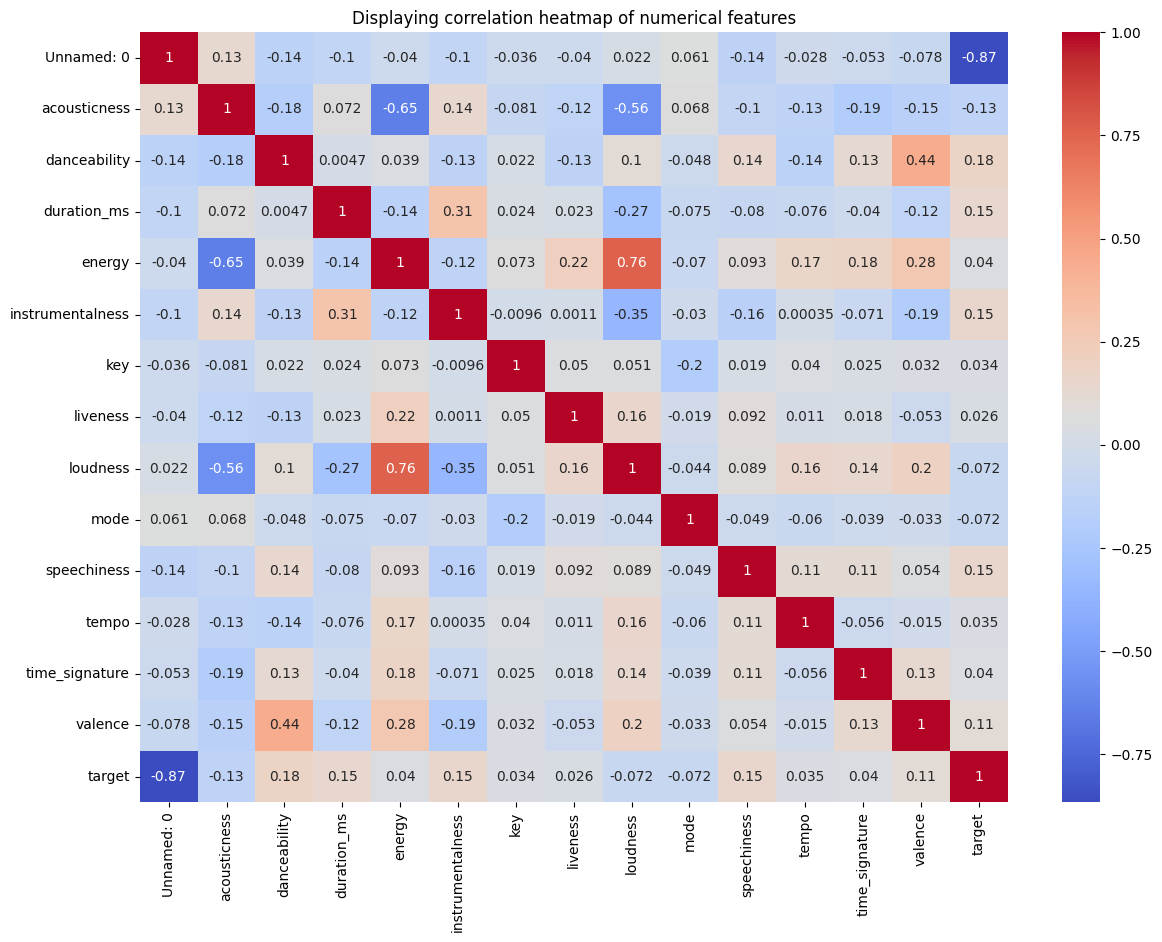

In [116]:
# Selecting only numeric columns from the DataFrame for correlation
numeric_df = df.select_dtypes(include='number')

# Plotting correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(14,10))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Displaying correlation heatmap of numerical features")
plt.show()

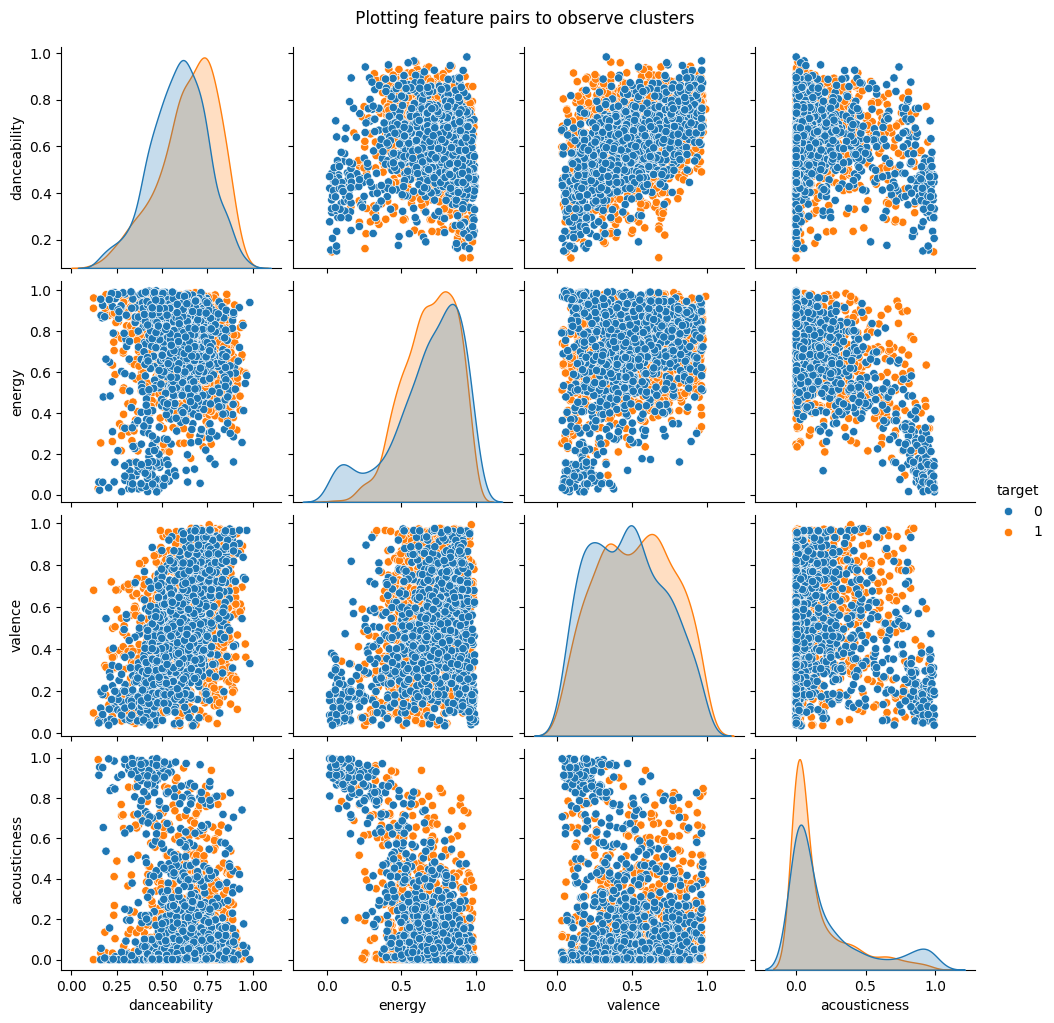

In [117]:
# Visualizing pairplot of a few important features
selected_features = ['danceability', 'energy', 'valence', 'acousticness', 'target']
sns.pairplot(df[selected_features], hue='target')
plt.suptitle(" Plotting feature pairs to observe clusters", y=1.02)
plt.show()

C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


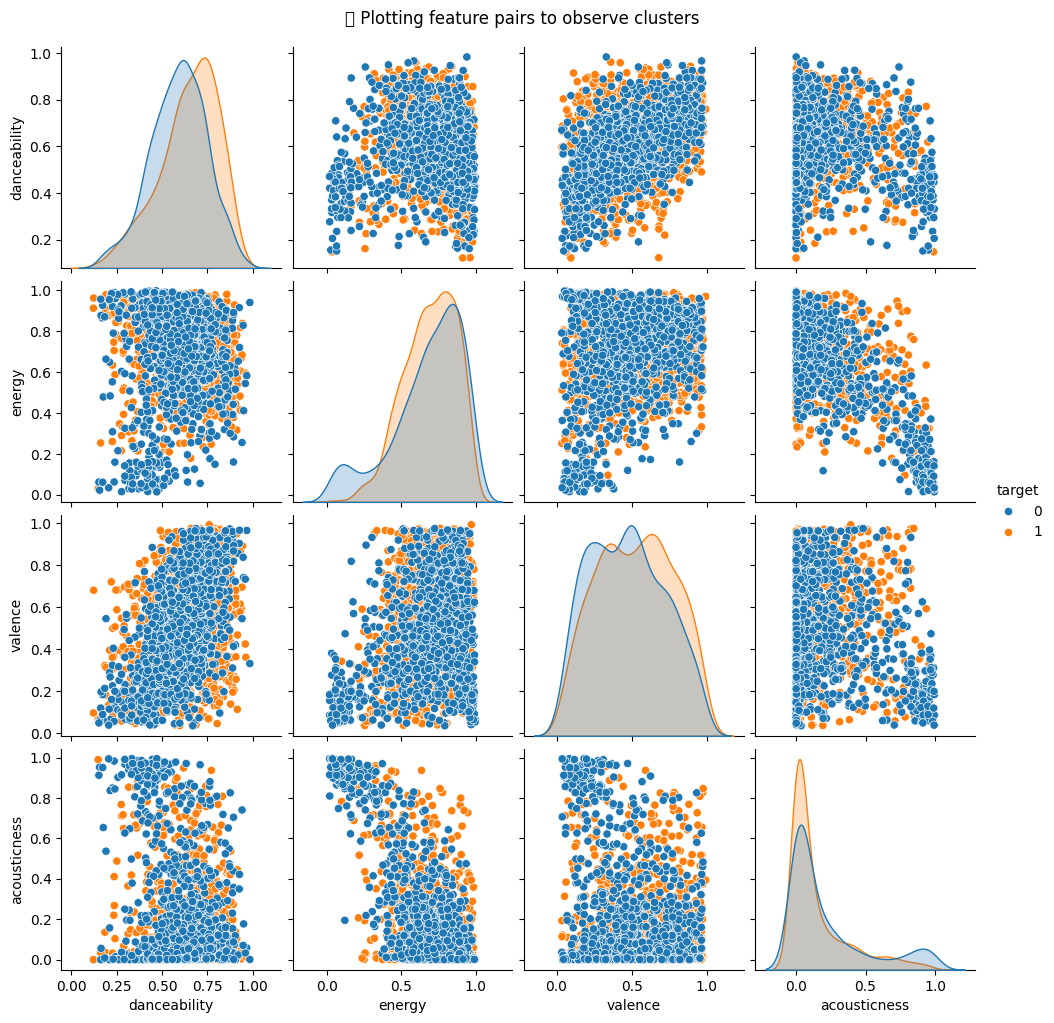

In [118]:
# Visualizing pairplot of a few important features
selected_features = ['danceability', 'energy', 'valence', 'acousticness', 'target']
sns.pairplot(df[selected_features], hue='target')
plt.suptitle("🎶 Plotting feature pairs to observe clusters", y=1.02)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3544\1356726385.py:16: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127932 (\N{MUSICAL SCORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


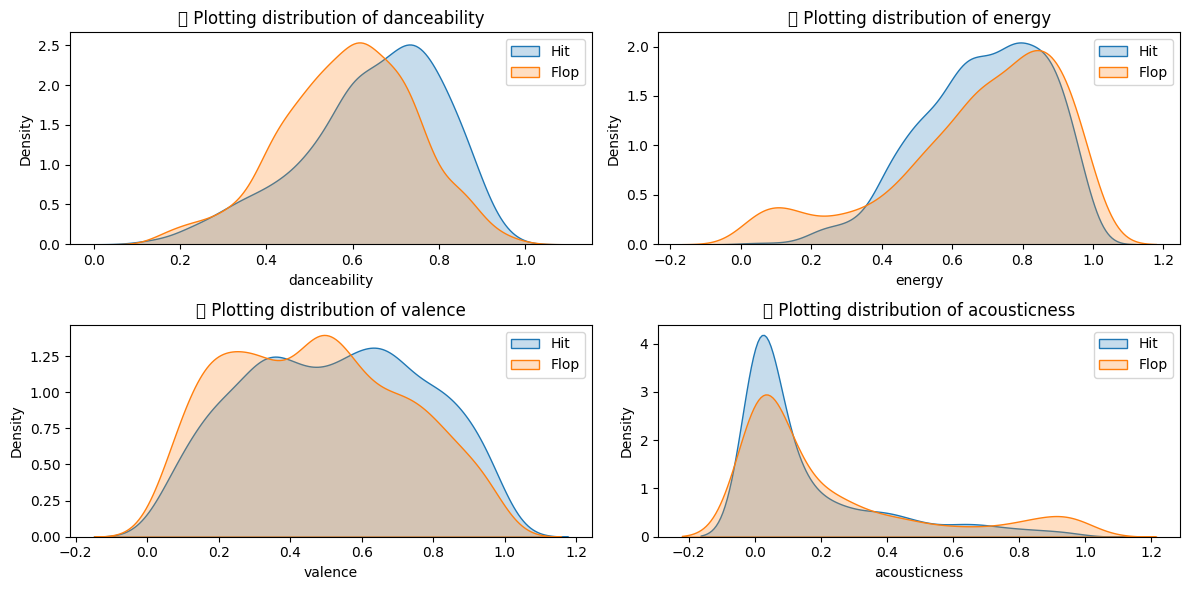

In [119]:
# Creating subsets for hit and flop songs
hit_songs = df[df['target'] == 1]
flop_songs = df[df['target'] == 0]

# Plotting distribution comparisons for key features
features_to_compare = ['danceability', 'energy', 'valence', 'acousticness']
plt.figure(figsize=(12,6))

for i, feature in enumerate(features_to_compare):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(hit_songs[feature], label="Hit", fill=True)
    sns.kdeplot(flop_songs[feature], label="Flop", fill=True)
    plt.title(f"🎼 Plotting distribution of {feature}")
    plt.legend()

plt.tight_layout()
plt.show()


## Step 3: Data Preprocessing

In [121]:
# Checking & Handling the Missing Values in the set

In [122]:
#Checking for missing values 
df.isnull().sum() 
#found no missing value 


Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [123]:
#Apply StandardScaler

In [124]:
# doing this to normalize all features so that they have the same scale, improving model performance and training stability
from sklearn.preprocessing import StandardScaler

#  Cleaning the dataset first
df_clean = df_full.dropna().drop_duplicates()

# (Optional) Viewing the cleaned shape
print(f" Cleaned dataset shape: {df_clean.shape}")

# Dropping non-numeric columns like song_title and artist
X = df_clean.drop(['target', 'song_title', 'artist'], axis=1)

# Setting target variable
y = df_clean['target']

# Scaling features so they have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Cleaned dataset shape: (2017, 17)


In [125]:
#Train-Test Split

In [126]:
#doing thisto divide the data into training and testing sets so the model can learn from one part and be tested on unseen data to check its performance.
from sklearn.model_selection import train_test_split

# Spliting the data into 80%  for training and  20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 4: Model Building (Logistic Regression)



In [128]:
# Logistic Regression Model 


In [129]:
#Importibg the model for evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [130]:
#Creating the logistic regression model
model = LogisticRegression(max_iter=10000)  

In [131]:
#Training the (fit) the model on training data
model.fit(X_train, y_train)  

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [132]:
#Predicting the labels on the test data
y_pred = model.predict(X_test)

## Step 5: Evaluation Metrics

In [134]:
#Calculating the Accuracy Score – how many predictions were correct
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.995049504950495


In [135]:
#Confusion Matrix – shows how many correct and incorrect classifications in matrix form
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[205   1]
 [  1 197]]


In [136]:
#Classification Report – includes precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       0.99      0.99      0.99       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



## Step 6: Comparing and Seeing how it works well with other model

In [138]:
# training decision tree model here

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("\n Decision Tree Classifier:")




 Decision Tree Classifier:


In [140]:
#Calculating the Accuracy Score – how many predictions were correct
print("Accuracy:", accuracy_score(y_test, dt_preds))

Accuracy: 1.0


In [141]:
#Confusion Matrix – shows how many correct and incorrect classifications in matrix form
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

Confusion Matrix:
 [[206   0]
 [  0 198]]


In [142]:
#Classification Report – includes precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, dt_preds))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [143]:
## training Random Forest model here

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n Random Forest Classifier:")




 Random Forest Classifier:


In [145]:
#Calculating the Accuracy Score – how many predictions were correct
print("Accuracy:", accuracy_score(y_test, rf_preds))

Accuracy: 1.0


In [146]:
#Confusion Matrix – shows how many correct and incorrect classifications in matrix form
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Confusion Matrix:
 [[206   0]
 [  0 198]]


In [147]:
#Classification Report – includes precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, rf_preds))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404



In [148]:
## training Support Vector Machine (SVM) model here

In [149]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n Support Vector Machine (SVM):")


 Support Vector Machine (SVM):


In [150]:
#Calculating the Accuracy Score – how many predictions were correct
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9826732673267327


In [151]:
#Confusion Matrix – shows how many correct and incorrect classifications in matrix form
svm_cm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:\n", svm_cm)

SVM Confusion Matrix:
 [[203   3]
 [  4 194]]


In [152]:
#Classification Report – includes precision, recall, and F1-score
svm_cr = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", svm_cr)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.98      0.98      0.98       198

    accuracy                           0.98       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.98      0.98      0.98       404



In [153]:
## ## training K-Nearest Neighbors (KNN) model here

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\n K-Nearest Neighbors (KNN):")


 K-Nearest Neighbors (KNN):


In [155]:
# Calculating the Accuracy Score – how many predictions were correct
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9455445544554455


In [156]:
# Confusion Matrix – shows how many correct and incorrect classifications in matrix form
knn_cm = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", knn_cm)

KNN Confusion Matrix:
 [[198   8]
 [ 14 184]]


In [157]:
# Classification Report – includes precision, recall, and F1-score
knn_cr = classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", knn_cr)


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       206
           1       0.96      0.93      0.94       198

    accuracy                           0.95       404
   macro avg       0.95      0.95      0.95       404
weighted avg       0.95      0.95      0.95       404



In [158]:
#plotting the Accuracy Comparison Graph for all the four models

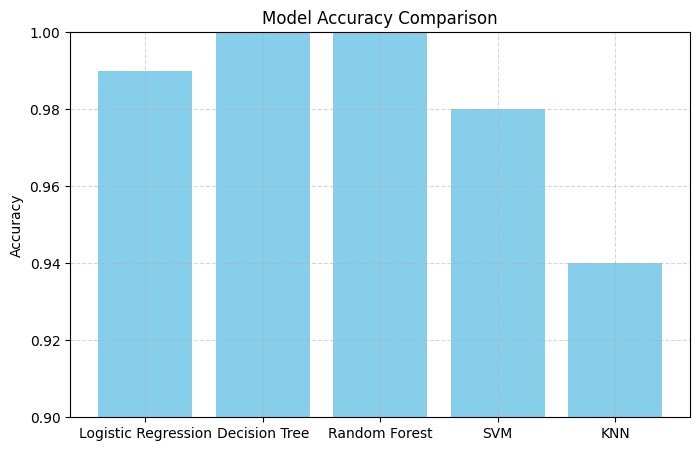

In [159]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree','Random Forest',  'SVM','KNN']
accuracies = [0.99, 1.0,1.0,  0.98,0.94]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [160]:
#Saving the Best Model (Random Forest)

In [165]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✅ Random Forest model saved as 'random_forest_model.pkl'")


✅ Random Forest model saved as 'random_forest_model.pkl'


## TESTING

In [168]:
import joblib
import numpy as np

# Load the trained model
model = joblib.load("random_forest_model.pkl")


In [170]:
# defining sample input for testing
# Define feature names (same order as training)
feature_names = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'time_signature', 'explicit'
]

# Example of a POPULAR track
popular_example = np.array([
    0.75, 0.85, 5, -5.0, 1, 0.04,
    0.1, 0.0, 0.12, 0.9, 120.0,
    210000, 4, 0
]).reshape(1, -1)

# Example of a NOT POPULAR track
not_popular_example = np.array([
    0.2, 0.3, 2, -15.0, 0, 0.4,
    0.8, 0.7, 0.5, 0.2, 85.0,
    150000, 3, 0
]).reshape(1, -1)


In [172]:
# predicting and getting the output
# Predict popular track
popular_pred = model.predict(popular_example)[0]
print("Popular Example Prediction:", "Popular" if popular_pred == 1 else "Not Popular")

# Predict not popular track
not_popular_pred = model.predict(not_popular_example)[0]
print("Not Popular Example Prediction:", "Popular" if not_popular_pred == 1 else "Not Popular")


Popular Example Prediction: Not Popular
Not Popular Example Prediction: Not Popular


In [174]:
# Using predict_probabilty to get confidence
popular_proba = model.predict_proba(popular_example)[0][1]  # probability for class 1
not_popular_proba = model.predict_proba(not_popular_example)[0][1]

print("Popular Track Probability (class 1):", round(popular_proba, 2))
print("Not Popular Track Probability (class 1):", round(not_popular_proba, 2))


Popular Track Probability (class 1): 0.12
Not Popular Track Probability (class 1): 0.15


In [176]:
#Checking Class Distribution in Dataset
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 791, 1: 822}


In [222]:
from sklearn.ensemble import RandomForestClassifier

# Automatically balances the class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [224]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       198

    accuracy                           1.00       404
   macro avg       1.00      1.00      1.00       404
weighted avg       1.00      1.00      1.00       404

Confusion Matrix:
 [[206   0]
 [  0 198]]


In [226]:
# Get probabilities
probs = model.predict_proba(X_test)

# Example: Check probability for the first test sample
first_prob = probs[0][1]  # Probability of being class 1 (popular)
print(f"Probability of being Popular: {first_prob:.2f}")

# Predict with a custom threshold if needed
custom_preds = (probs[:, 1] > 0.4).astype(int)


Probability of being Popular: 0.04
